<a href="https://colab.research.google.com/github/Sohamch03/F1-Analysis-Python/blob/main/F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

races = pd.read_csv("/content/races.csv")
drivers = pd.read_csv("/content/drivers.csv")
constructors = pd.read_csv("/content/constructors.csv")
results = pd.read_csv("/content/results.csv")
circuits = pd.read_csv("/content/circuits.csv")
driver_standings = pd.read_csv("/content/driver_standings.csv")

# --- Initial Inspection ---
print("Races shape:", races.shape)
print("Drivers shape:", drivers.shape)
print("Results shape:", results.shape)
print("Races head:")
print(results.head())


Races shape: (1125, 18)
Drivers shape: (861, 9)
Results shape: (26759, 18)
Races head:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  sta

Data Cleaning and Merging

In [5]:
# Merge results with drivers and races
df = results.merge(drivers, on='driverId') \
            .merge(races, on='raceId') \
            .merge(constructors, on='constructorId')

# Create a 'full_name' column
df['driver'] = df['forename'] + ' ' + df['surname']
df.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url,driver
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Lewis Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Nick Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Nico Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Fernando Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Heikki Kovalainen


 Number of races each year

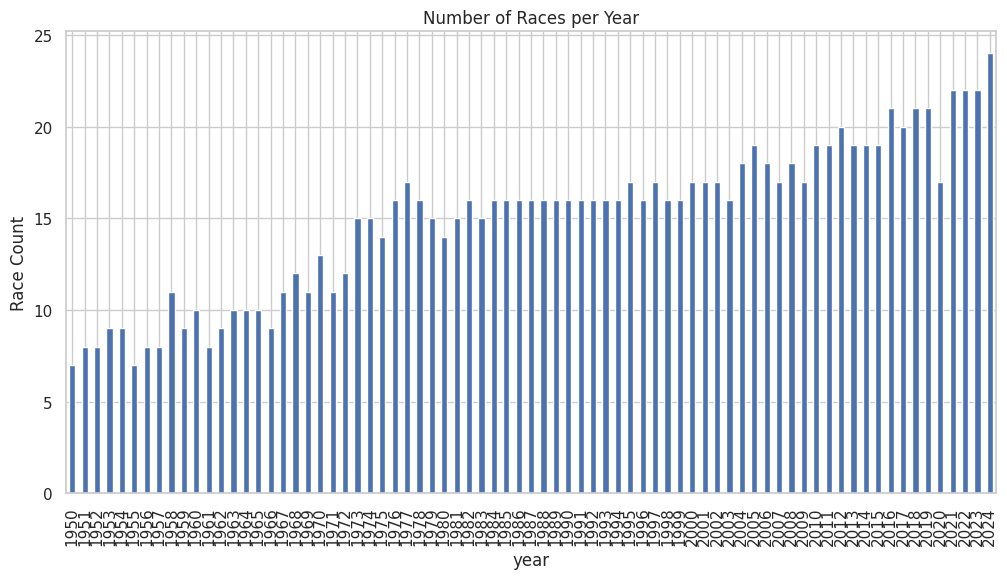

In [6]:
races_per_year = races.groupby('year').size()
races_per_year.plot(kind='bar', title='Number of Races per Year')
plt.ylabel("Race Count")
plt.show()


Top 10 Winning Drivers


In [7]:
wins = df[df['positionOrder'] == 1].groupby('driver')['raceId'].count().sort_values(ascending=False).head(10)
wins

,raceId
driver,
Lewis Hamilton,105
Michael Schumacher,91
Max Verstappen,63
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27


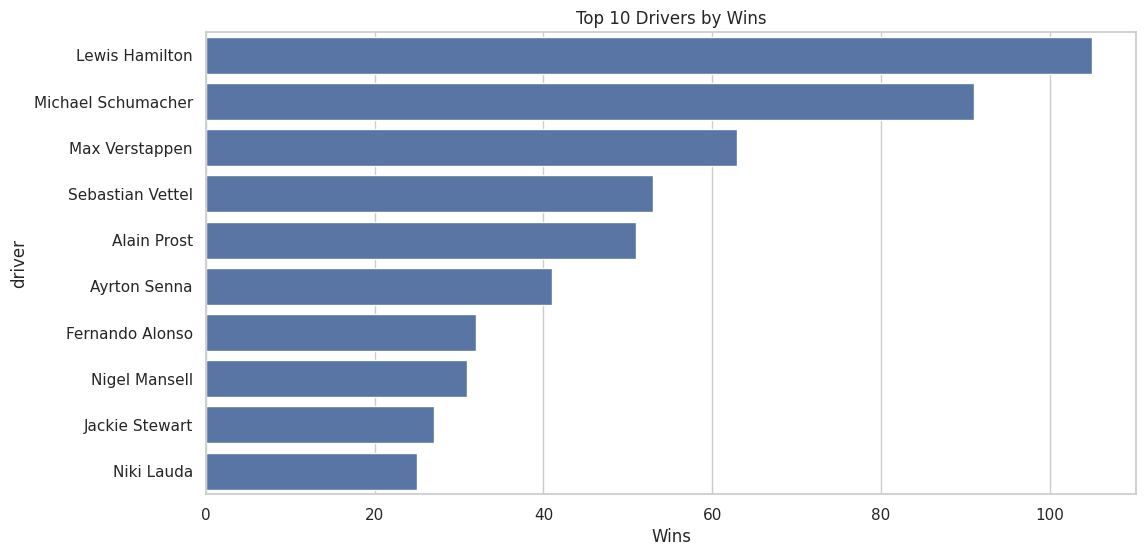

In [8]:
wins = df[df['positionOrder'] == 1].groupby('driver')['raceId'].count().sort_values(ascending=False).head(10)
sns.barplot(x=wins.values, y=wins.index)
plt.title("Top 10 Drivers by Wins")
plt.xlabel("Wins")
plt.show()


Top 10 Constructors

In [9]:
top_teams = df[df['positionOrder'] == 1].groupby('name_y')['raceId'].count().sort_values(ascending=False).head(10)
top_teams

,raceId
name_y,
Ferrari,249
McLaren,185
Mercedes,129
Red Bull,122
Williams,114
Team Lotus,45
Renault,35
Benetton,27
Tyrrell,23


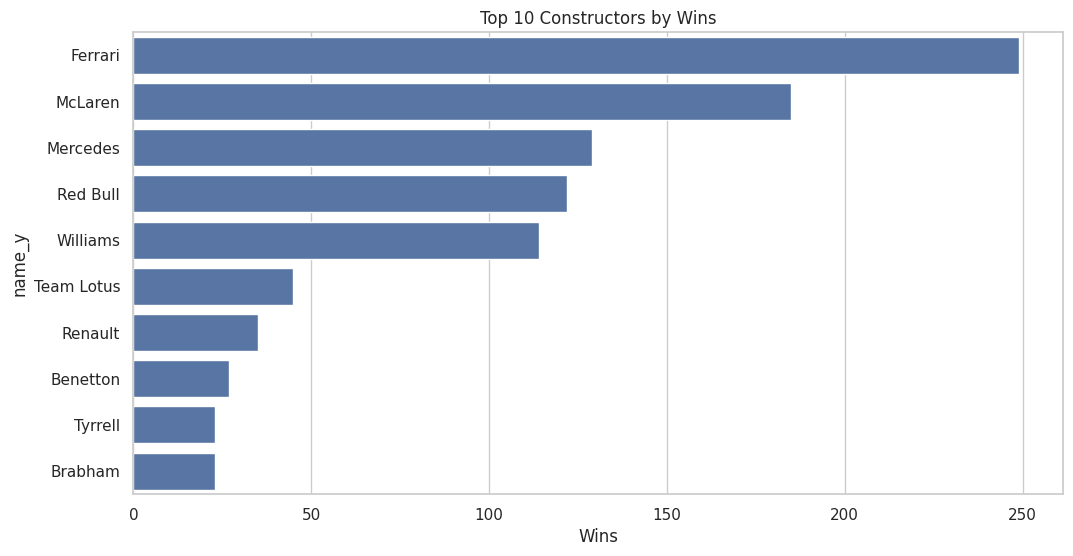

In [10]:
top_teams = df[df['positionOrder'] == 1].groupby('name_y')['raceId'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 10 Constructors by Wins")
plt.xlabel("Wins")
plt.show()


 Driver Nationalities

In [11]:
top_nations = drivers['nationality'].value_counts().head(10)
top_nations

,count
nationality,
British,166
American,158
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Belgian,23
Swiss,23


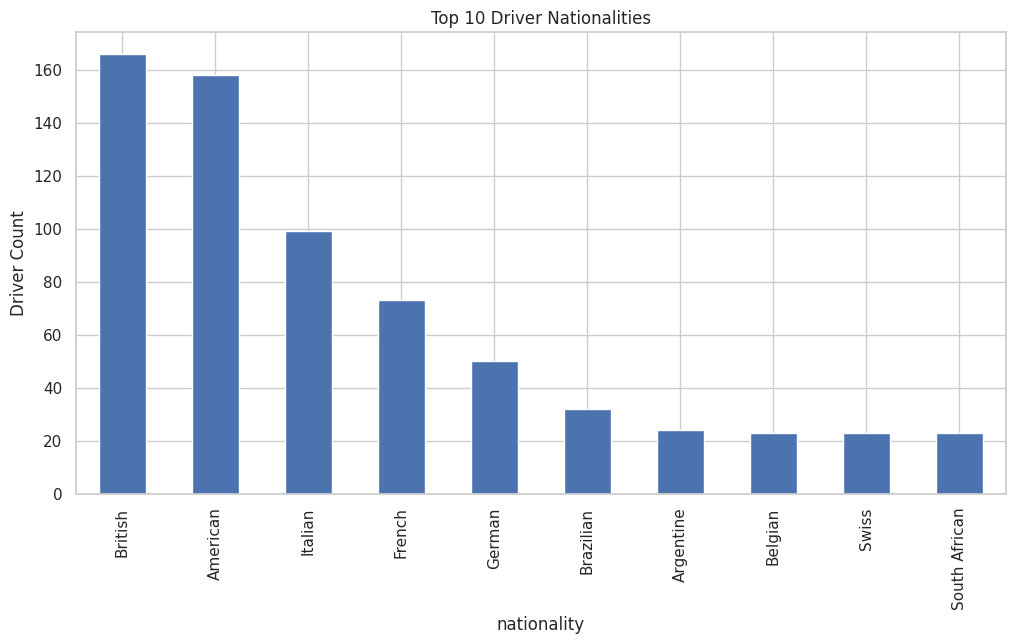

In [12]:
top_nations = drivers['nationality'].value_counts().head(10)
top_nations.plot(kind='bar', title='Top 10 Driver Nationalities')
plt.ylabel("Driver Count")
plt.show()


 Fastest Laps

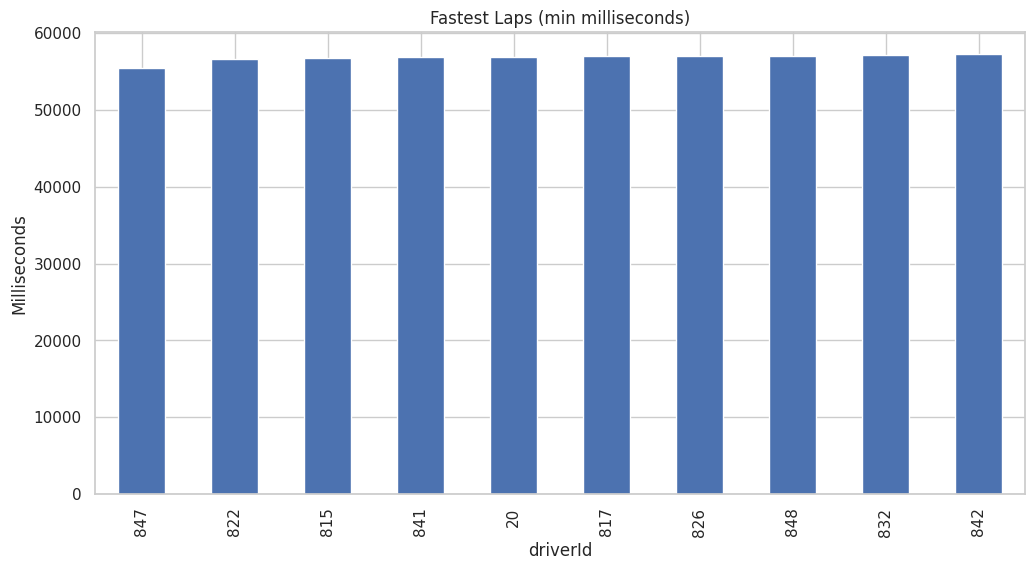

In [13]:
lap_times = pd.read_csv("/content/lap_times.csv")
fastest_laps = lap_times.groupby('driverId')['milliseconds'].min().sort_values().head(10)
fastest_laps.plot(kind='bar', title='Fastest Laps (min milliseconds)')
plt.ylabel("Milliseconds")
plt.show()


Total Podiums by Driver

In [14]:
podiums = df[df['positionOrder'].isin([1,2,3])]
top_podiums = podiums.groupby('driver')['raceId'].count().sort_values(ascending=False).head(10)
top_podiums

,raceId
driver,
Lewis Hamilton,202
Michael Schumacher,155
Sebastian Vettel,122
Max Verstappen,112
Alain Prost,106
Fernando Alonso,106
Kimi Räikkönen,103
Ayrton Senna,80
Rubens Barrichello,68


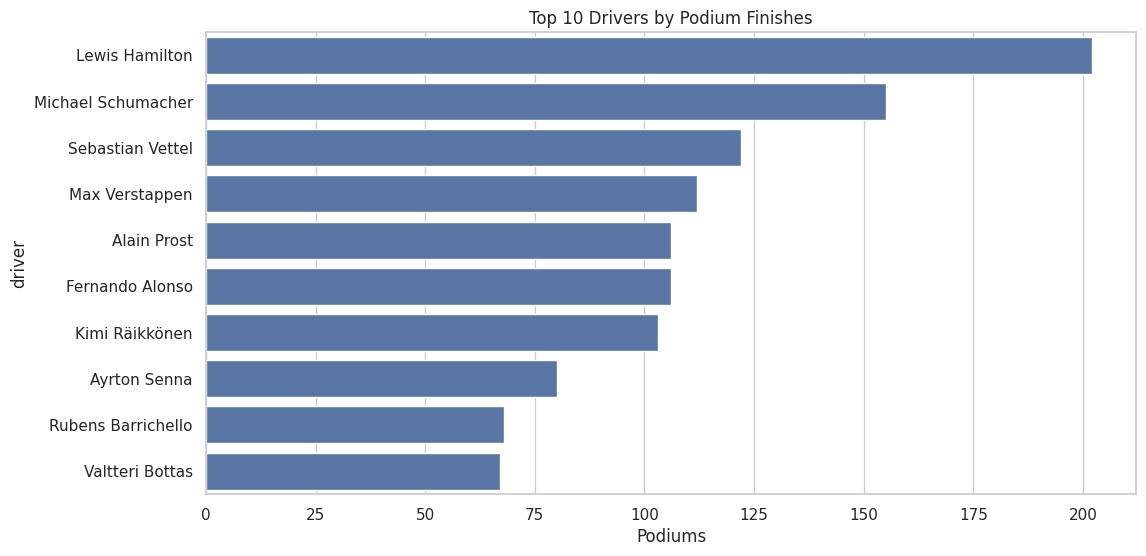

In [15]:
sns.barplot(x=top_podiums.values, y=top_podiums.index)
plt.title("Top 10 Drivers by Podium Finishes")
plt.xlabel("Podiums")
plt.show()


Pole Positions

In [16]:
pole = df[df['grid'] == 1].groupby('driver')['raceId'].count().sort_values(ascending=False).head(10)
pole

,raceId
driver,
Lewis Hamilton,104
Michael Schumacher,68
Ayrton Senna,65
Sebastian Vettel,57
Max Verstappen,40
Jim Clark,34
Alain Prost,33
Nigel Mansell,32
Nico Rosberg,30


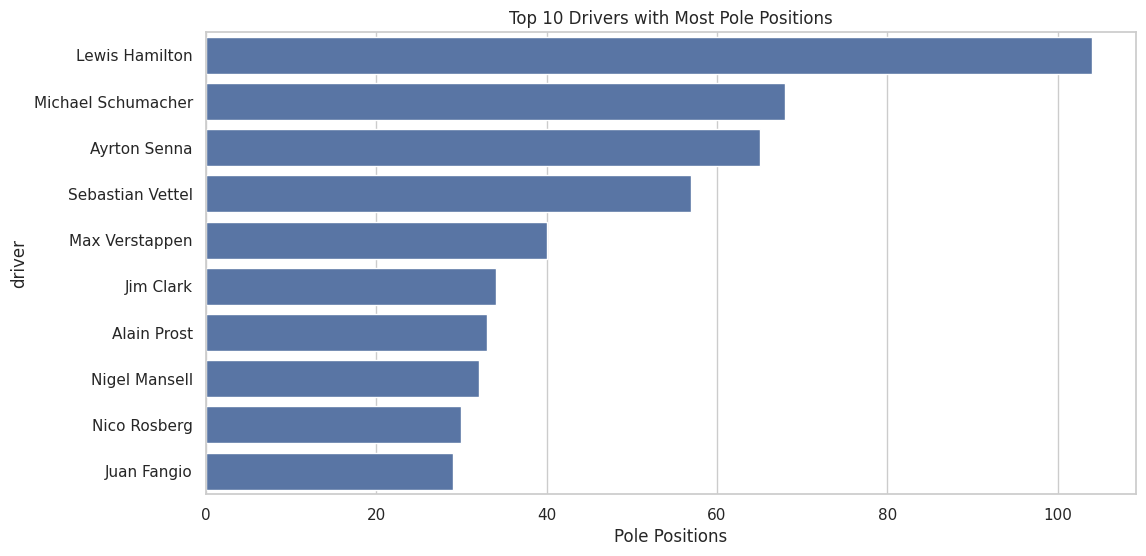

In [17]:
pole = df[df['grid'] == 1].groupby('driver')['raceId'].count().sort_values(ascending=False).head(10)
sns.barplot(x=pole.values, y=pole.index)
plt.title("Top 10 Drivers with Most Pole Positions")
plt.xlabel("Pole Positions")
plt.show()

Constructor Dominance (1950-2020)

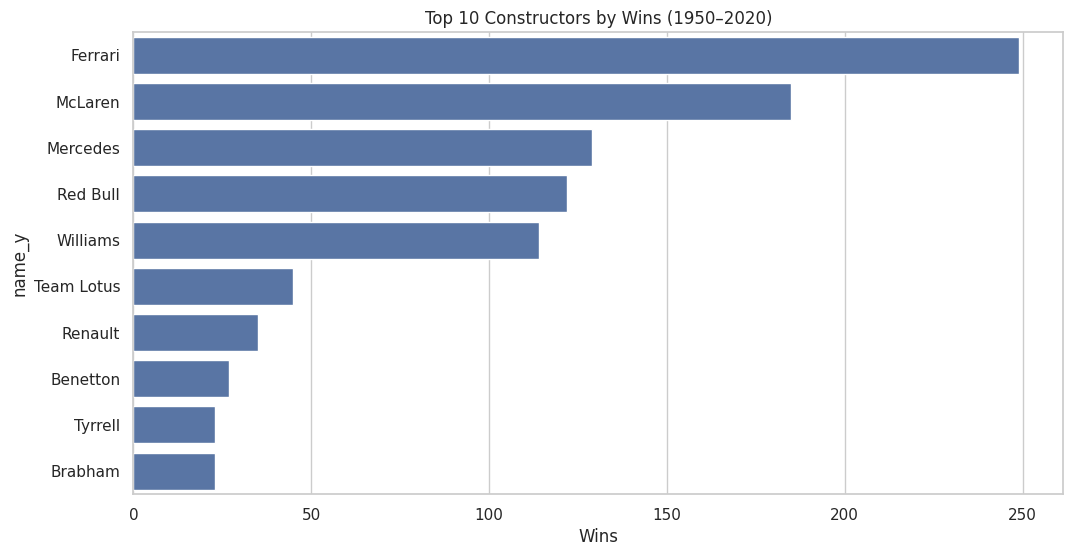

In [18]:
constructor_wins = df[df['positionOrder'] == 1].groupby('name_y')['raceId'].count().sort_values(ascending=False).head(10)
sns.barplot(y=constructor_wins.index, x=constructor_wins.values)
plt.title("Top 10 Constructors by Wins (1950–2020)")
plt.xlabel("Wins")
plt.show()


Circuits with Most Races

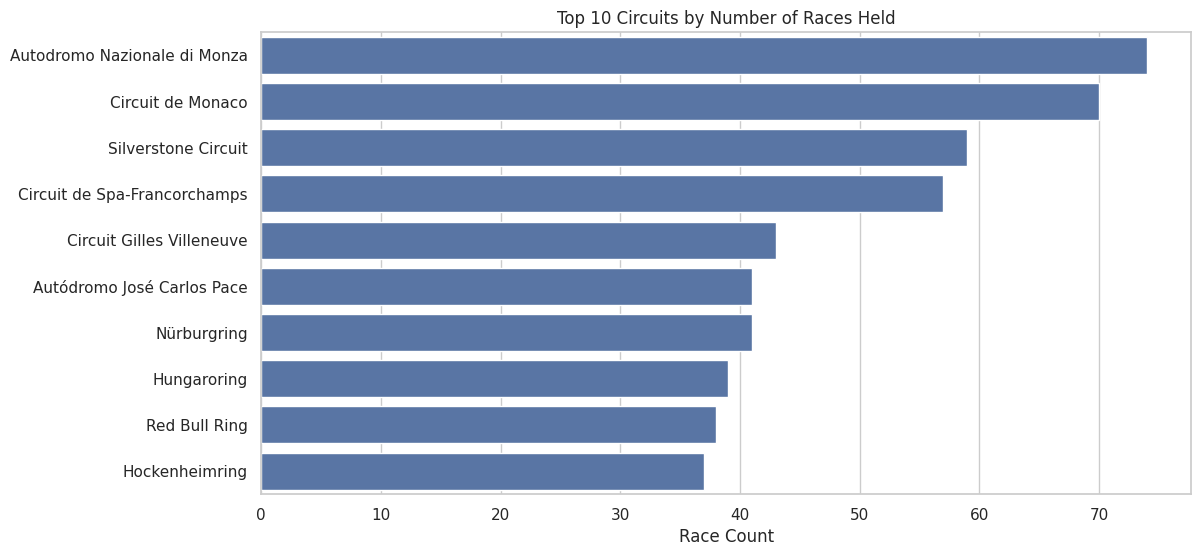

In [23]:
circuit_counts = races['circuitId'].value_counts().head(10)
circuit_names = circuits.set_index('circuitId').loc[circuit_counts.index]['name']
sns.barplot(x=circuit_counts.values, y=circuit_names.values)
plt.title("Top 10 Circuits by Number of Races Held")
plt.xlabel("Race Count")
plt.show()


 Drivers with Longest Careers

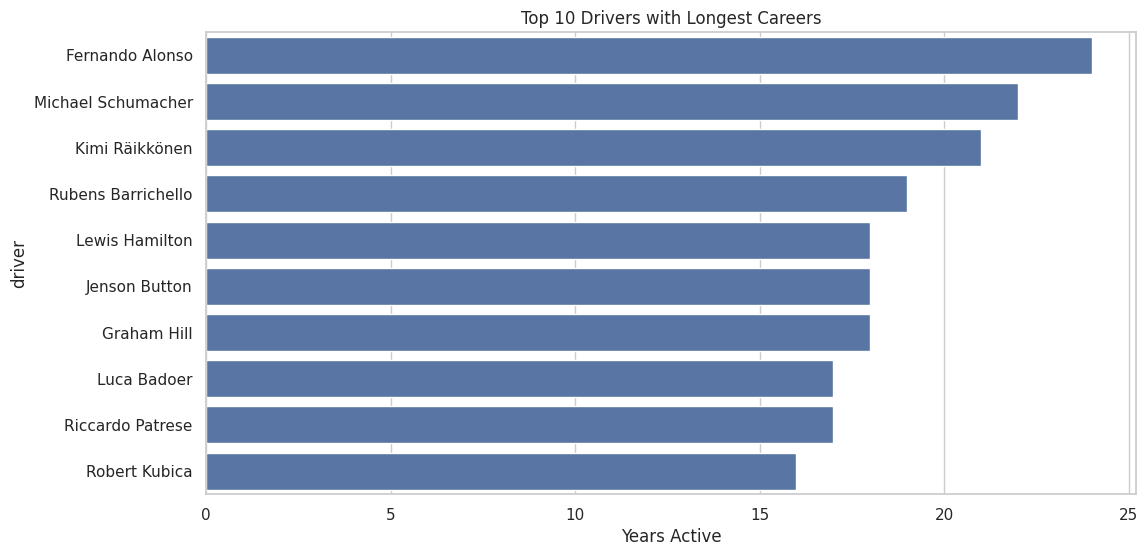

In [24]:
career_span = df.groupby('driver')['year'].agg(['min', 'max'])
career_span['years_active'] = career_span['max'] - career_span['min'] + 1
longest_careers = career_span.sort_values(by='years_active', ascending=False).head(10)

sns.barplot(x=longest_careers['years_active'], y=longest_careers.index)
plt.title("Top 10 Drivers with Longest Careers")
plt.xlabel("Years Active")
plt.show()


Average Finishing Position by Driver

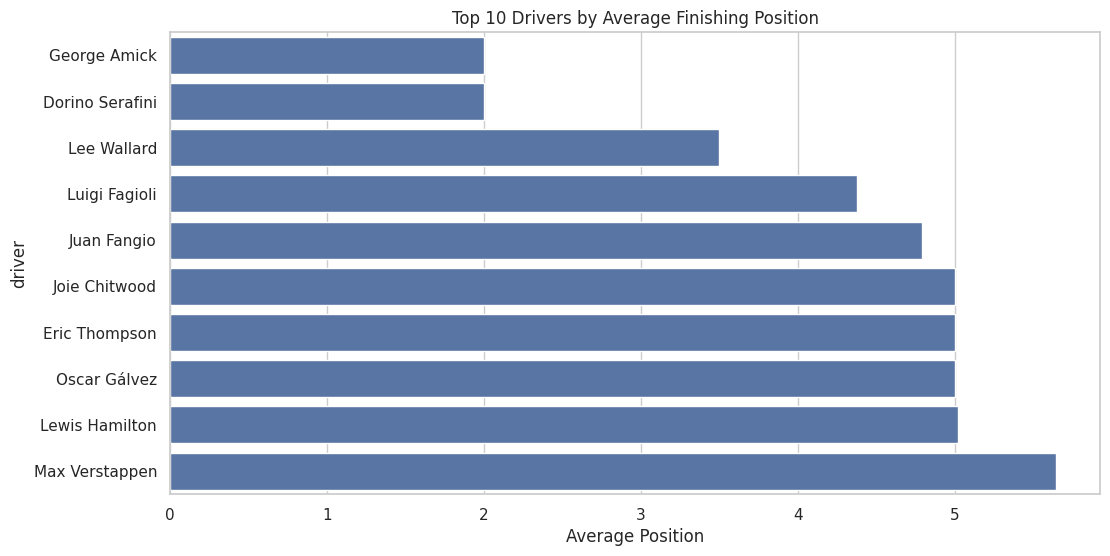

In [26]:
avg_finish = df[df['positionOrder'] > 0].groupby('driver')['positionOrder'].mean().sort_values().head(10)
sns.barplot(x=avg_finish.values, y=avg_finish.index)
plt.title("Top 10 Drivers by Average Finishing Position")
plt.xlabel("Average Position")
plt.show()


Fastest Circuit by Average Lap Time

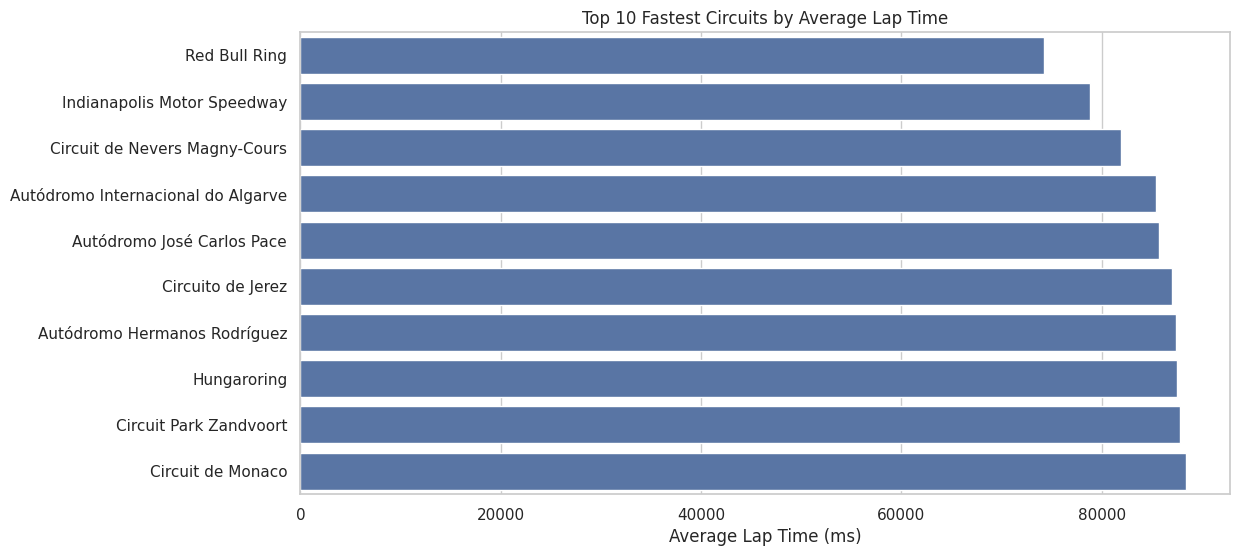

In [27]:
lap_times = pd.read_csv('lap_times.csv')
lap_with_race = lap_times.merge(races[['raceId', 'circuitId']], on='raceId')
avg_lap_per_circuit = lap_with_race.groupby('circuitId')['milliseconds'].mean().sort_values().head(10)
fastest_circuits = circuits.set_index('circuitId').loc[avg_lap_per_circuit.index]['name']

sns.barplot(x=avg_lap_per_circuit.values, y=fastest_circuits.values)
plt.title("Top 10 Fastest Circuits by Average Lap Time")
plt.xlabel("Average Lap Time (ms)")
plt.show()


Wins from Back of the Grid (Grid position > 15)

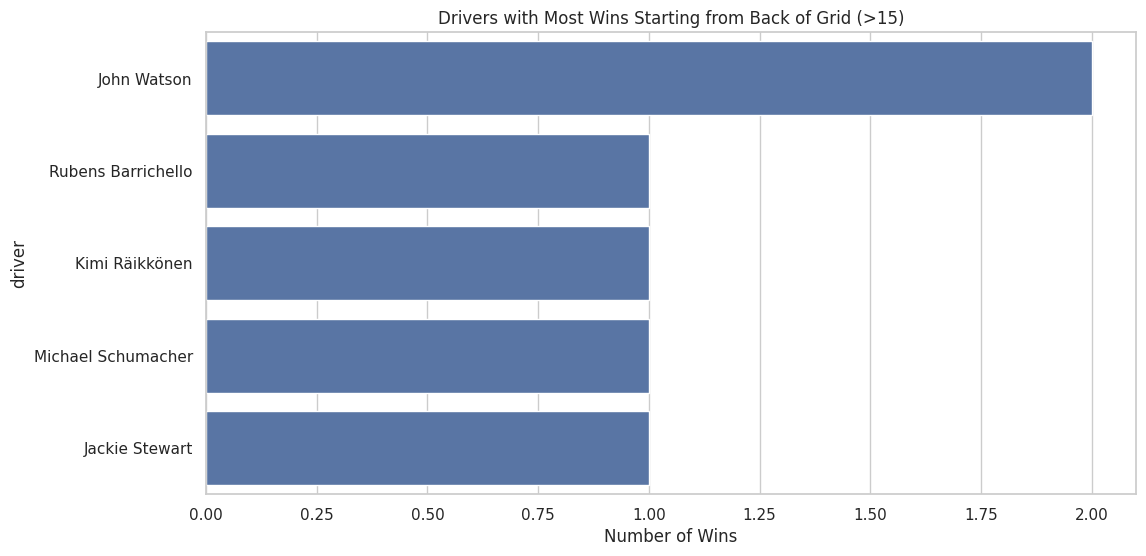

In [28]:
back_grid_wins = df[(df['grid'] > 15) & (df['positionOrder'] == 1)]
top_back_winners = back_grid_wins['driver'].value_counts().head(5)

sns.barplot(x=top_back_winners.values, y=top_back_winners.index)
plt.title("Drivers with Most Wins Starting from Back of Grid (>15)")
plt.xlabel("Number of Wins")
plt.show()
